In [1]:
import numpy as np
import pickle
import os
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
sys.path
sys.path.append('../models')
sys.path.append('../simulation')
import TS_personal_params_pooled as pp
import TS_global_params_pooled as gtp
%matplotlib inline

In [2]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [3]:
def plot_and_save_dict(d,title,save_title,save=False,i=None,ax=None):
    x =get_to_plot_actions(d['actions'])
    print(np.array(x[100:]).mean())
    #plt.figure(1) 
    #ax[0][i].ylim(.45,1)
    #ax[0][i].yticks(np.arange(.45, 1, step=0.15))
    ax[0][i].plot(x)
    
    plt.ylabel('Percent correct action rho*')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_percent_correct_action.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    #plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    #ax[1][i].plot(to_plotr)
    #plt.ylabel('Regret')
    #plt.xlabel('Decision times')
    #plt.title(title)
    #if save:
    #    plt.savefig('{}_{}_regret.png'.format(save_title,title))

In [24]:
with open('../../Downloads/cases_to_plot.pkl','rb') as f:
    pooled = pickle.load(f)

In [5]:
#steps = steps+[k['steps'] for k in d['history'].values() if k['avail'] and k['decision_time']]


In [25]:
with open('../../Downloads/to_save_personalized.pkl','rb') as f:
    personalized = pickle.load(f)

In [39]:
with open('../../Downloads/to_save_batch.pkl','rb') as f:
    batch = pickle.load(f)

In [45]:
def plot_all_special():
    
    fig, ax = plt.subplots(nrows=1, ncols=3)
    fig.tight_layout()
    #'case_one','case_two',
    cases = ['case_one','case_two','case_three']
    plt.setp(ax[:],  yticks = np.arange(.3, 1, step=0.15),ylim = [.45,1])
    #plt.setp(ax[1,:],  yticks = np.arange(0, .5, step=0.05),ylim = [0,.5])
    
    for i in range(len(cases)):
        
            b =get_to_plot_actions(batch[cases[i]]['actions'])
            ax[i].plot([b[j] for j in range(0,len(b),20)],label='Complete')
            
            p =get_to_plot_actions(personalized[cases[i]]['actions'])
            ax[i].plot([p[j] for j in range(0,len(p),20)],label='PS')
            
            po =get_to_plot_actions(pooled[cases[i]]['actions'])
            ax[i].plot([po[j] for j in range(0,len(po),20)],label='Pooled')
    plt.legend(loc='upper left') 

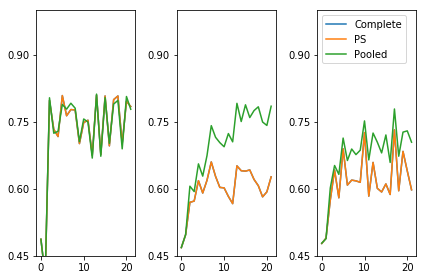

In [46]:
plot_all_special()